# Supervised Models - Performance Metrics

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import math
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('UberEdited.csv')
df.head()

,Unnamed: 0,index,Unumber,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_range
0,0,129546,4264204,2013-10-11 20:42:00.000000209,13.50,2013-10-11 20:42:00 UTC,-73.968367,40.755280,-74.000925,40.731782,1,3.705146,4.0
1,1,157708,16914374,2009-05-22 22:56:00.000000207,28.25,2009-05-22 22:56:00 UTC,-73.871200,40.773960,-73.996203,40.759870,1,13.958072,10000.0
2,2,146825,274789,2011-02-28 06:56:44.0000002,6.90,2011-02-28 06:56:44 UTC,-73.996791,40.737605,-73.977832,40.763559,1,2.261968,3.0
3,3,192482,11942062,2015-01-04 17:04:31.0000004,39.33,2015-01-04 17:04:31 UTC,-73.873100,40.774040,-73.985306,40.732552,1,12.588475,10000.0
4,4,187756,42996243,2014-04-27 12:59:00.000000182,14.50,2014-04-27 12:59:00 UTC,-73.956453,40.771052,-73.991773,40.749097,1,3.999675,4.0


In [4]:
df = df.drop(columns=['index','Unumber','key','pickup_datetime','distance_range'])


In [5]:
medianFare = np.median(df["fare_amount"])
print(medianFare)

8.5


In [6]:
FareBucket = []
for amount in df["fare_amount"]:
    if amount > 8.5:
        FareBucket.append("1")
    else:
        FareBucket.append("0")
df["FareBucket"] = FareBucket


In [8]:
df.drop(columns="fare_amount")

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,FareBucket
0,0,-73.968367,40.755280,-74.000925,40.731782,1,3.705146,1
1,1,-73.871200,40.773960,-73.996203,40.759870,1,13.958072,1
2,2,-73.996791,40.737605,-73.977832,40.763559,1,2.261968,0
3,3,-73.873100,40.774040,-73.985306,40.732552,1,12.588475,1
4,4,-73.956453,40.771052,-73.991773,40.749097,1,3.999675,1
...,...,...,...,...,...,...,...,...
137137,137179,-74.007737,40.704722,-73.970580,40.751642,1,4.391599,1
137138,137180,-73.968899,40.763346,-73.977598,40.753115,1,1.020828,0
137139,137181,-73.987548,40.718471,-74.013865,40.709392,4,2.950456,1
137140,137182,-73.968810,40.767775,-73.955563,40.768348,1,1.478575,0


In [9]:
training_data = df.sample(frac=0.67, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 91885
No. of testing examples: 45257


In [10]:
def load_train_data():
    y_train = training_data['FareBucket']
    X_train = training_data.drop(columns='FareBucket')
    X_train = X_train.astype(int)
    y_train = y_train.astype(int)
    return X_train, y_train
def load_test_data():
    y_test = testing_data['FareBucket']
    X_test = testing_data.drop(columns='FareBucket')
    X_test = X_test.astype(int)
    y_test = y_test.astype(int)
    return X_test, y_test

In [11]:
X_train, y_train = load_train_data()
X_test, y_test = load_test_data()

In [12]:
df.isnull().sum()


Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
FareBucket           0
dtype: int64

In [13]:
rfc = RandomForestClassifier()
y_pred = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred, target_names=["high", "low"]))

              precision    recall  f1-score   support

        high       0.97      0.97      0.97     23988
         low       0.97      0.97      0.97     21269

    accuracy                           0.97     45257
   macro avg       0.97      0.97      0.97     45257
weighted avg       0.97      0.97      0.97     45257



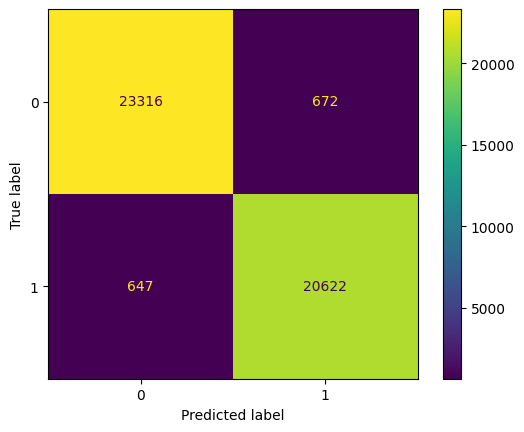

<Figure size 10x10 with 0 Axes>

In [15]:
cm = confusion_matrix(y_test,y_pred)
cmDisply = ConfusionMatrixDisplay(cm)
cmDisply.plot()
plt.figure(figsize=(0.1,0.1))
plt.show()


In [16]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: ", RMSE)
print("Mean Absolute Percentage Error: ",mean_absolute_percentage_error(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred, pos_label=0) 
print("Precision:", precision)
# Calculate error rate error_rate = 1 - accuracy print("Error rate:", error_rate)
# Calculate sensitivity
sensitivity = recall_score(y_test, y_pred, pos_label=0) 
print("Sensitivity:", sensitivity)
# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
specificity = tn / (tn+fp)
print("Specificity:", specificity)
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC:", roc_auc)
# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0) 
print("F1 score:", f1)

Root Mean Square Error:  0.17071807960527224
Mean Absolute Percentage Error:  66871841916012.41
Accuracy: 0.9708553372958879
Precision: 0.973000041731002
Sensitivity: 0.9719859929964982
Specificity: 0.9719859929964982
ROC AUC: 0.9707830665532587
F1 score: 0.9724927530187066


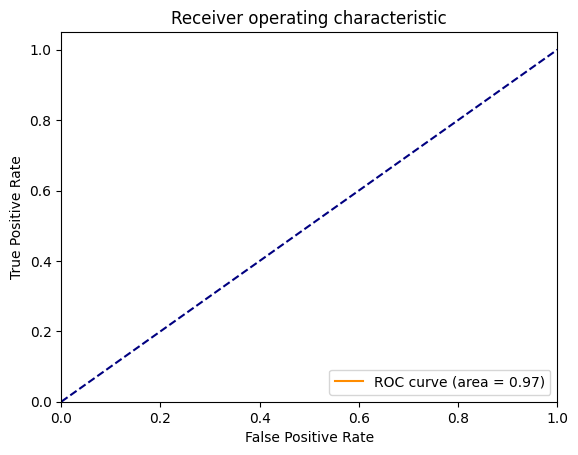

In [17]:
fpr=fp/(fp+tn)
tpr=tp/(tp+fn)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' %roc_auc)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right")
plt.show()